In [2]:
import pandas as pd
import time
import os
from google.colab import drive
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt


#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
#Mount drive
drive.mount('/content/gdrive')

2.12.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mounted at /content/gdrive


In [3]:
path = '/content/gdrive/MyDrive/cipherfiles/'
#directory_files = os.listdir(path)
class_count = 6

In [4]:
mastercsvpath = path + 'main.csv'
masterdf = pd.read_csv(mastercsvpath)

In [5]:
masterdf = masterdf.iloc[:,1:]
masterdf.head(10)

,Class,Length,Alphanumeric,Non-Alphanumeric,Alpha,Digit,Lowercase,Uppercase,a,b,...,~[,~\,~],~^,~_,~`,~{,~|,~},~~
0,0,11,11,0,11,0,9,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,11,11,0,9,2,6,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,22,21,1,19,2,5,14,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,11,11,0,10,1,6,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,11,11,0,10,1,4,6,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,11,11,0,9,2,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,11,11,0,9,2,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,11,11,0,10,1,8,2,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,11,11,0,9,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,11,10,1,8,2,4,4,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
masterdf = masterdf.apply(pd.to_numeric, downcast='integer')

In [7]:
masterdf = masterdf.sample(frac = 1)

In [ ]:
masterdf.head(10)

In [9]:
X = masterdf.drop(columns=['Class'])
y = masterdf['Class']

In [12]:

dummy_y = np_utils.to_categorical(y)
dummy_y

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=123)

In [77]:
tf.keras.backend.clear_session()
input_number = X_train.shape[1]
print("input number = ", input_number)

model = Sequential()

model.add(Dense(4096, activation='relu',name='First_Layer', input_shape=(input_number,)))
model.add(Dropout(rate = 0.5,name='Dropout_Layer'))
model.add(Dense(2048, activation='relu',name='Second_Layer'))
model.add(Dense(1024, activation='relu',name='Third_Layer'))
model.add(Dropout(rate = 0.5,name='Dropout_Layer2'))
model.add(Dense(512, activation='relu',name='Fourth_Layer'))
model.add(Dense(class_count, activation='softmax',name='Fully_Connected_Layer'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

input number =  8937
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Layer (Dense)         (None, 4096)              36610048  
                                                                 
 Dropout_Layer (Dropout)     (None, 4096)              0         
                                                                 
 Second_Layer (Dense)        (None, 2048)              8390656   
                                                                 
 Third_Layer (Dense)         (None, 1024)              2098176   
                                                                 
 Dropout_Layer2 (Dropout)    (None, 1024)              0         
                                                                 
 Fourth_Layer (Dense)        (None, 512)               524800    
                                                                 
 Fully_Connected_Layer (Dens  (None

In [78]:
history = model.fit(X_train, y_train, validation_split=0.25, verbose=1, epochs=30)

Epoch 1/30
942/942 [==============================] - 23s 17ms/step - loss: 0.3916 - accuracy: 0.7858 - val_loss: 0.2664 - val_accuracy: 0.8222
Epoch 2/30
942/942 [==============================] - 14s 14ms/step - loss: 0.2759 - accuracy: 0.8262 - val_loss: 0.2589 - val_accuracy: 0.8356
Epoch 3/30
942/942 [==============================] - 12s 13ms/step - loss: 0.2517 - accuracy: 0.8450 - val_loss: 0.2400 - val_accuracy: 0.8371
Epoch 4/30
942/942 [==============================] - 13s 14ms/step - loss: 0.2471 - accuracy: 0.8553 - val_loss: 0.2439 - val_accuracy: 0.8415
Epoch 5/30
942/942 [==============================] - 13s 14ms/step - loss: 0.2375 - accuracy: 0.8771 - val_loss: 0.2563 - val_accuracy: 0.8480
Epoch 6/30
942/942 [==============================] - 13s 13ms/step - loss: 0.2030 - accuracy: 0.8955 - val_loss: 0.2647 - val_accuracy: 0.8464
Epoch 7/30
942/942 [==============================] - 13s 14ms/step - loss: 0.1753 - accuracy: 0.9153 - val_loss: 0.2920 - val_accuracy:

In [79]:
y_pred = model.predict(X_test)

619/619 [==============================] - 2s 3ms/step


In [80]:
preds_classes = np.argmax(y_pred, axis=-1)
preds_classes

array([1, 3, 1, ..., 5, 3, 4])

In [66]:
c0 = "Blowfish"
c1 = "Caesar"
c2 = "DES"
c3 = "MD5"
c4 = "Monoalphabetic"
c5 = "RSA"

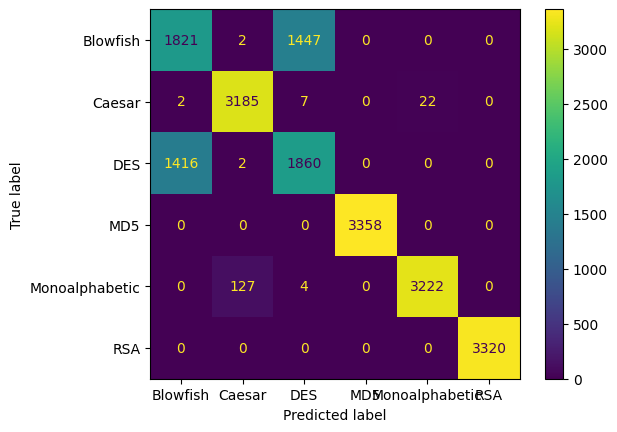

In [81]:
y_test = np.argmax(y_test, axis=-1)
cfm = confusion_matrix(y_test, preds_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [c0, c1, c2, c3, c4, c5])
cm_display.plot()
plt.show()

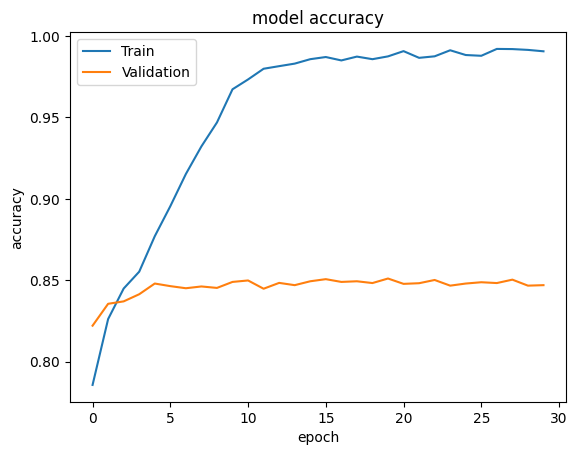

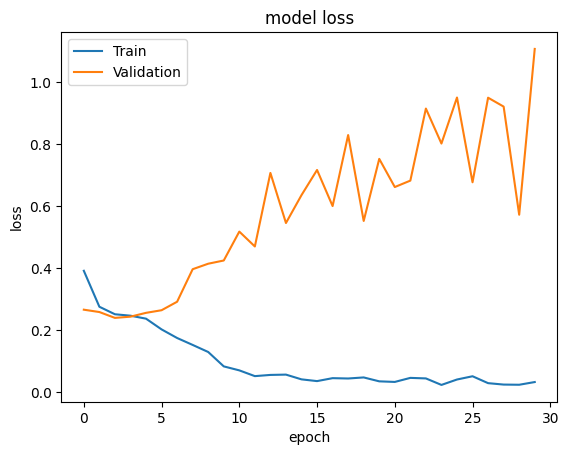

In [82]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

